# Compressive Strength Concrete Problem

- (concrete strength to bear the load) is a highly nonlinear function of age and ingredients
- regression problem
- Characteristics:
    - multivariat
    - no. of instances = 1030, no. of attributes:9
    - missing value: na


In [2]:
#Load libraries
import keras
import numpy as np
import pandas as pd


## Step 1: Load Data

In [3]:
df = pd.read_csv('compresive_strength_concrete.csv')
df.head()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [4]:
df.shape

(1030, 9)

In [5]:
df.dtypes

Cement (component 1)(kg in a m^3 mixture)                float64
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    float64
Fly Ash (component 3)(kg in a m^3 mixture)               float64
Water  (component 4)(kg in a m^3 mixture)                float64
Superplasticizer (component 5)(kg in a m^3 mixture)      float64
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     float64
Fine Aggregate (component 7)(kg in a m^3 mixture)        float64
Age (day)                                                  int64
Concrete compressive strength(MPa, megapascals)          float64
dtype: object

## Step 2: Preprocessing
    - Check Missing Values (If Exist: Fill each record with mean of its feature)
    - Find and remove duplicates
    - Drop unnecessary columns
    - categorical data conversion

In [6]:
df.isnull().sum()

Cement (component 1)(kg in a m^3 mixture)                0
Blast Furnace Slag (component 2)(kg in a m^3 mixture)    0
Fly Ash (component 3)(kg in a m^3 mixture)               0
Water  (component 4)(kg in a m^3 mixture)                0
Superplasticizer (component 5)(kg in a m^3 mixture)      0
Coarse Aggregate  (component 6)(kg in a m^3 mixture)     0
Fine Aggregate (component 7)(kg in a m^3 mixture)        0
Age (day)                                                0
Concrete compressive strength(MPa, megapascals)          0
dtype: int64

In [7]:
df.duplicated().sum()

25

In [8]:
df.drop_duplicates(inplace=True)
df.shape

(1005, 9)

## Step 3: Standardized the Input Variables. 
- Hint: Centeralized the data

--> Done after splitting

In [9]:
X = df.iloc[:, :-1].values   
y = df.iloc[:, -1].values     

## Step 4:  Split 


In [10]:
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state= 0)


In [11]:
mean = x_train.mean(axis=0)
x_train -= mean
std = x_train.std(axis=0)
x_train /= std

x_test -= mean
x_test /= std


## Step 5&6:  Build Model & Compile & Validate 
- input Layer (No. of features ), 
- 3 hidden layers including 10,8,6 unit
- Output Layer with activation function relu/tanh (check by experiment).

(Note : Its a Regression problem , select loss , metrics according to it)

In [12]:
#copied and modified from book:

from keras import models
from keras import layers

def build_model():
    model = models.Sequential()
    model.add(layers.Dense(32, activation='relu', input_shape=(8,)))
    model.add(layers.Dense(10, activation='relu'))
    model.add(layers.Dense(8, activation='relu'))
    model.add(layers.Dense(6, activation='relu'))
    model.add(layers.Dense(1)) 
    model.compile(optimizer='rmsprop', loss='mse', metrics=['mae'])
    return model

In [13]:

k = 4
num_val_samples = len(x_train) // k
num_epochs = 500
all_mae_histories = []

for i in range(k):
    print('processing fold #', i)
    val_data = x_train[i * num_val_samples: (i + 1) * num_val_samples]
    val_targets = y_train[i * num_val_samples: (i + 1) * num_val_samples]

    partial_x_train = np.concatenate([x_train[:i * num_val_samples], x_train[(i + 1) * num_val_samples:]], axis=0)
    partial_y_train = np.concatenate([y_train[:i * num_val_samples], y_train[(i + 1) * num_val_samples:]], axis=0)

    model = build_model()
    history = model.fit(partial_x_train, partial_y_train,validation_data=(val_data, val_targets), epochs=num_epochs, batch_size=1, verbose=0)
    mae_history = history.history['val_mae']
    all_mae_histories.append(mae_history)
    

processing fold # 0
processing fold # 1
processing fold # 2
processing fold # 3


Matplotlib is building the font cache; this may take a moment.


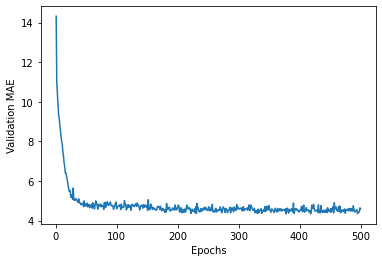

In [14]:
#Now plotting:

average_mae_history = [np.mean([x[i] for x in all_mae_histories]) for i in range(num_epochs)]

import matplotlib.pyplot as plt

plt.plot(range(1, len(average_mae_history) + 1), average_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.show()


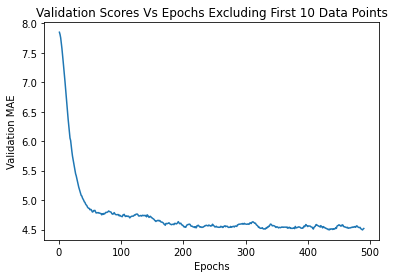

In [15]:
##Plotting by excluding first 10 points

def smooth_curve(points, factor= 0.9):
  smoothed_points = []
  for point in points:
    if smoothed_points:
      previous = smoothed_points[-1]
      smoothed_points.append(previous * factor + point * (1 - factor))
    else:
      smoothed_points.append(point)
  return smoothed_points

smooth_mae_history = smooth_curve(average_mae_history[10:])

plt.plot(range(1,len(smooth_mae_history) + 1), smooth_mae_history)
plt.xlabel('Epochs')
plt.ylabel('Validation MAE')
plt.title('Validation Scores Vs Epochs Excluding First 10 Data Points')
plt.show()

## Step 7: Train the Model with Epochs

In [16]:
model.fit(x_train, y_train, epochs=100, batch_size=10, verbose=0)


## Step 8: Evaluation Step & Prediction

In [18]:
test_mse_score, test_mae_score = model.evaluate(x_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 31.3565 - mae: 4.0385


In [19]:
print("The mae score is: ",test_mae_score)
print("The mse score: is: ",test_mse_score)

The mae score is:  4.038525104522705
The mse score: is:  31.35647201538086
